In [1]:
# imports
import pandas as pd

import numpy as np  
import matplotlib.pyplot as plt

In [72]:
# load data
df = pd.read_csv('../data/all_currencies.csv', index_col=0)
df

,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
0,2015-11-12,$$$,0.000013,0.000017,0.000013,0.000017,142.0,NaN
1,2015-11-13,$$$,0.000017,0.000033,0.000016,0.000024,85.0,NaN
2,2015-11-14,$$$,0.000024,0.000053,0.000023,0.000030,131.0,NaN
3,2015-11-15,$$$,0.000030,0.000063,0.000022,0.000035,132.0,NaN
4,2015-11-16,$$$,0.000035,0.000046,0.000032,0.000036,280.0,NaN
...,...,...,...,...,...,...,...,...
298,2018-09-23,ZZC,0.067149,0.067324,0.024069,0.024161,34.0,130705.0
299,2018-09-24,ZZC,0.024167,0.091875,0.024121,0.091631,58.0,47041.0
300,2018-09-25,ZZC,0.091528,0.091568,0.057507,0.090547,752.0,178158.0
301,2018-09-26,ZZC,0.090400,0.104745,0.086071,0.086559,60.0,175963.0


In [3]:
df.columns

Index(['Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Market Cap'],
      dtype='object')

In [4]:
df['Market Cap'].isna().value_counts()

False    567841
True      64377
Name: Market Cap, dtype: int64

In [5]:
df.Symbol.nunique()

887

In [6]:
df.Symbol.value_counts()[:70]

NMC     1979
LTC     1979
BTC     1979
NVC     1978
PPC     1978
        ... 
ZEIT    1650
EFL     1647
SLR     1644
ECC     1644
NLG     1634
Name: Symbol, Length: 70, dtype: int64

In [7]:
max(df.Symbol)

'ZZC'

In [8]:
# # find coin threshold
# threshold = 0.8
# coins = coin_data_points > max(coin_data_points)*threshold
# coins_are_false = coins.values

# # remove coins where values are False
# coins.where(coins_are_false, inplace=True)
# coins.dropna(inplace=True)

# ts = df[df['Symbol'].isin(coins.index)]
# ts

In [9]:
coins_by_count = df['Symbol'].value_counts()
threshold = 0.8
# Only points with the most data points.
filt = coins_by_count > (threshold * max(coins_by_count))

most_common_coins = coins_by_count[filt]
ts = df[df['Symbol'].isin(most_common_coins.index)]
ts

,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
0,2014-01-14,42,1.013620e+06,1.146320e+06,714246.000000,793273.000000,227918.0,832411.0
1,2014-01-15,42,7.931300e+05,8.848600e+05,732467.000000,785399.000000,125684.0,686616.0
2,2014-01-16,42,7.848430e+05,7.848430e+05,446406.000000,606667.000000,125138.0,709966.0
3,2014-01-17,42,6.058400e+05,6.058400e+05,470964.000000,503448.000000,68414.0,571094.0
4,2014-01-18,42,5.043310e+05,5.043310e+05,300906.000000,361200.000000,65047.0,484557.0
...,...,...,...,...,...,...,...,...
1835,2018-09-23,ZET,2.703000e-03,2.779000e-03,0.002577,0.002665,45598.0,455969.0
1836,2018-09-24,ZET,2.639000e-03,2.746000e-03,0.002546,0.002687,48981.0,445029.0
1837,2018-09-25,ZET,2.678000e-03,2.694000e-03,0.002474,0.002587,44178.0,451662.0
1838,2018-09-26,ZET,2.557000e-03,2.627000e-03,0.002461,0.002534,42550.0,431287.0


In [10]:
ts

,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
0,2014-01-14,42,1.013620e+06,1.146320e+06,714246.000000,793273.000000,227918.0,832411.0
1,2014-01-15,42,7.931300e+05,8.848600e+05,732467.000000,785399.000000,125684.0,686616.0
2,2014-01-16,42,7.848430e+05,7.848430e+05,446406.000000,606667.000000,125138.0,709966.0
3,2014-01-17,42,6.058400e+05,6.058400e+05,470964.000000,503448.000000,68414.0,571094.0
4,2014-01-18,42,5.043310e+05,5.043310e+05,300906.000000,361200.000000,65047.0,484557.0
...,...,...,...,...,...,...,...,...
1835,2018-09-23,ZET,2.703000e-03,2.779000e-03,0.002577,0.002665,45598.0,455969.0
1836,2018-09-24,ZET,2.639000e-03,2.746000e-03,0.002546,0.002687,48981.0,445029.0
1837,2018-09-25,ZET,2.678000e-03,2.694000e-03,0.002474,0.002587,44178.0,451662.0
1838,2018-09-26,ZET,2.557000e-03,2.627000e-03,0.002461,0.002534,42550.0,431287.0


# Meta Data

In [11]:
# create empty dataframe for meta data]
# give data frame columns of special values
meta_data = pd.DataFrame(columns=['Symbol', 'Start Date', 'End Date', 'Start Value', 'End Value','ATH Date', 'ATL Date', 'ATH', 'ATL', 'Num_values'])

In [12]:
#test date
serg_date = df.iloc[-1]['Date']

In [13]:
serg_date

'2018-09-27'

In [14]:
# max(df.Date).strftime('%Y-%m-%d')

In [15]:
# find start, end dates and number of data points for each coin
i=0
for coin in ts.Symbol.unique():
    # instantiate list to add to metadata frame
    my_list = [coin]
    
    # get data for coin from big df
    df = ts[ts['Symbol'] == coin]

    # find start date
    start_date = min(df.Date) #.strftime('%Y-%m-%d')
    my_list.append(start_date)
    
    # find end date
    end_date = max(df.Date) #.strftime('%Y-%m-%d')
    my_list.append(end_date)
    
    # find starting value
    my_list.append(df.Open.iloc[0])

    # find ending value
    my_list.append(df.Close.iloc[-1])

    # find ATH date
    ath_date = df['Date'].loc[df['High'] == max(df['High'])]
    # get date only
    ath_date = ath_date.iloc[0] #.strftime('%Y-%m-%d')
    my_list.append(ath_date)
    
    
    # find ATL date
    atl_date = df['Date'].loc[df['Low'] == min(df['Low'])]
    # get date only
    atl_date = atl_date.iloc[0] #.strftime('%Y-%m-%d')
    my_list.append(atl_date)
    
    # find all time high
    my_list.append(max(df.High))

    # find all time low
    my_list.append(min(df.Low))

    # find number of entries
    my_list.append(df.shape[0])

    # add coin info to dataframe
    meta_data.loc[i] = my_list
#     print(coin)
    i+=1
        
meta_data

,Symbol,Start Date,End Date,Start Value,End Value,ATH Date,ATL Date,ATH,ATL,Num_values
0,42,2014-01-14,2018-09-27,1.013620e+06,24176.000000,2014-01-14,2016-05-12,1.146320e+06,8.990000e+00,1703
1,AC,2014-04-20,2018-09-27,5.434000e-03,0.002804,2018-01-15,2015-02-01,4.646900e-02,1.170000e-04,1596
2,ANC,2013-07-15,2018-09-27,2.806800e-02,1.600000,2013-12-02,2017-03-25,1.293000e+01,5.918000e-03,1885
3,ARG,2013-07-04,2018-09-27,7.780000e-03,0.108349,2013-12-01,2013-07-16,1.160000e+00,2.280000e-04,1777
4,ARI,2014-02-20,2018-09-27,4.050000e-04,0.000534,2018-01-15,2016-12-07,2.910100e-02,8.000000e-06,1631
...,...,...,...,...,...,...,...,...,...,...
89,XPM,2013-07-11,2018-09-27,2.633760e-01,0.655008,2013-11-29,2015-04-15,7.580000e+00,1.775500e-02,1905
90,XRP,2013-08-04,2018-09-27,5.874000e-03,0.541381,2018-01-04,2014-07-07,3.840000e+00,2.802000e-03,1881
91,XWC,2014-04-18,2018-09-27,2.732000e-03,0.093300,2017-12-19,2015-11-13,4.458950e-01,6.600000e-05,1620
92,ZEIT,2014-03-20,2018-09-27,6.000000e-06,0.000037,2017-06-06,2014-08-13,1.073000e-03,5.300000e-07,1650


In [16]:
meta_data.describe()

,Start Value,End Value,ATH,ATL
count,9.400000e+01,94.000000,9.400000e+01,9.400000e+01
mean,1.078734e+04,333.500073,1.245063e+04,8.400791e-01
std,1.045465e+05,2579.209701,1.182254e+05,6.809034e+00
min,7.700000e-07,0.000009,2.470000e-04,3.000000e-09
25%,1.755500e-03,0.002987,1.224720e-01,2.500000e-05
50%,1.160600e-02,0.020649,6.972130e-01,2.050000e-04
75%,1.993230e-01,0.136871,3.710000e+00,2.437000e-03
max,1.013620e+06,24176.000000,1.146320e+06,6.553000e+01


In [17]:
meta_data

,Symbol,Start Date,End Date,Start Value,End Value,ATH Date,ATL Date,ATH,ATL,Num_values
0,42,2014-01-14,2018-09-27,1.013620e+06,24176.000000,2014-01-14,2016-05-12,1.146320e+06,8.990000e+00,1703
1,AC,2014-04-20,2018-09-27,5.434000e-03,0.002804,2018-01-15,2015-02-01,4.646900e-02,1.170000e-04,1596
2,ANC,2013-07-15,2018-09-27,2.806800e-02,1.600000,2013-12-02,2017-03-25,1.293000e+01,5.918000e-03,1885
3,ARG,2013-07-04,2018-09-27,7.780000e-03,0.108349,2013-12-01,2013-07-16,1.160000e+00,2.280000e-04,1777
4,ARI,2014-02-20,2018-09-27,4.050000e-04,0.000534,2018-01-15,2016-12-07,2.910100e-02,8.000000e-06,1631
...,...,...,...,...,...,...,...,...,...,...
89,XPM,2013-07-11,2018-09-27,2.633760e-01,0.655008,2013-11-29,2015-04-15,7.580000e+00,1.775500e-02,1905
90,XRP,2013-08-04,2018-09-27,5.874000e-03,0.541381,2018-01-04,2014-07-07,3.840000e+00,2.802000e-03,1881
91,XWC,2014-04-18,2018-09-27,2.732000e-03,0.093300,2017-12-19,2015-11-13,4.458950e-01,6.600000e-05,1620
92,ZEIT,2014-03-20,2018-09-27,6.000000e-06,0.000037,2017-06-06,2014-08-13,1.073000e-03,5.300000e-07,1650


In [18]:
ath = meta_data.ATH
atl = meta_data.ATL
num = meta_data.Num_values

Text(0.5, 0.9, 'Highs, Lows vs Number of Data Points')

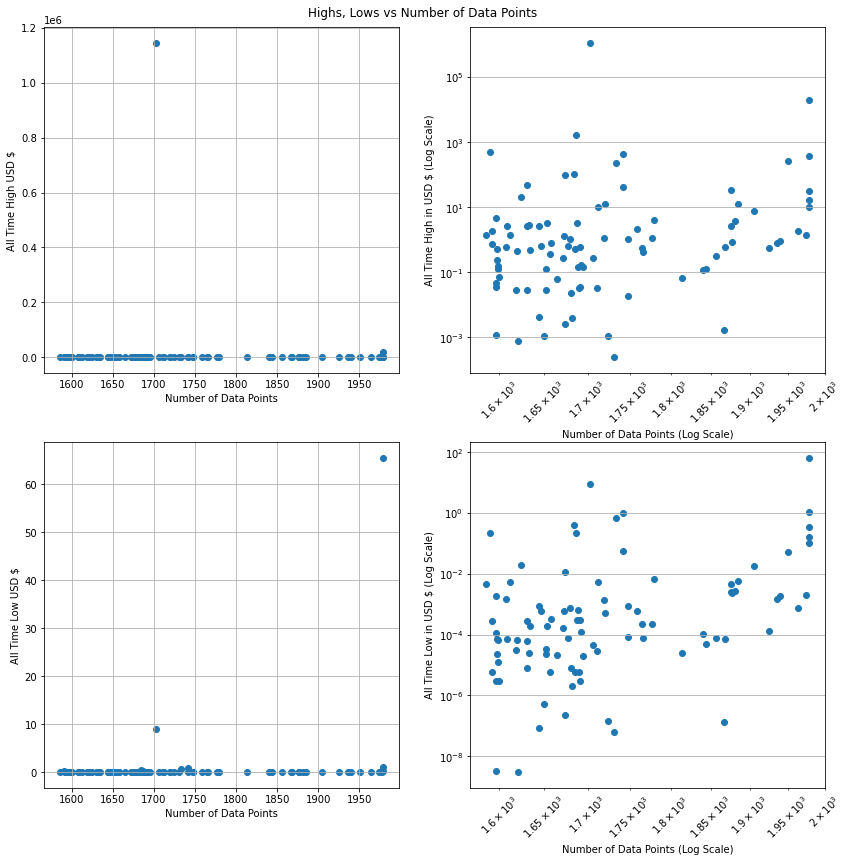

In [19]:
# show how history of coin compares with coin value visually

# plot ATH and ATL 
m = 2
n = 2
figsize = (14,14)
fig, ax = plt.subplots(nrows=m, ncols=n, figsize=figsize)

# turn grids on 
# for i in range(0,m):
#     for k in range(0,n):
#         ax[i,k].grid(True)
ax[0,0].grid(True)
ax[0,1].grid(True)
ax[1,0].grid(True)
ax[1,1].grid(True)


ax[0,0].scatter(num, ath)
ax[0,0].set_xlabel('Number of Data Points')
ax[0,0].set_ylabel('All Time High USD $')


ax[0,1].scatter(num, ath)
ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')
ax[0,1].set_xlabel('Number of Data Points (Log Scale)')
ax[0,1].set_ylabel('All Time High in USD $ (Log Scale)')
plt.setp(ax[0,1].xaxis.get_minorticklabels(), rotation=45)

ax[1,0].scatter(num, atl)
ax[1,0].set_xlabel('Number of Data Points')
ax[1,0].set_ylabel('All Time Low USD $')

ax[1,1].scatter(num, atl)
ax[1,1].set_xscale('log')
ax[1,1].set_yscale('log')
ax[1,1].set_xlabel('Number of Data Points (Log Scale)')
ax[1,1].set_ylabel('All Time Low in USD $ (Log Scale)')
plt.setp(ax[1,1].xaxis.get_minorticklabels(), rotation=45)


# ax[1,1].set_xticklabels(ax[1,1].get_xticks(), rotation=45)
# ax[1,1].tick_params(axis='x', labelrotation=45)
# ax[1,1].tick_params(axis = 'both', labelrotation=45)
# plt.tick_params(labelrotation=45)
# for tick in ax[1,1].get_xticklabels():
#     tick.set_rotation(45)

fig.suptitle('Highs, Lows vs Number of Data Points', y=0.9)

In [20]:
# create example histogram to test
x = [123, 670, 50, 327, 910]
INCREMENT = 500
hist = {}

for val in x:
  bin = (val // INCREMENT) * INCREMENT
  freq = hist.get(bin, 0) + 1
  hist[bin] = freq

hist

{0: 3, 500: 2}

Text(0, 0.5, 'Number of Coins')

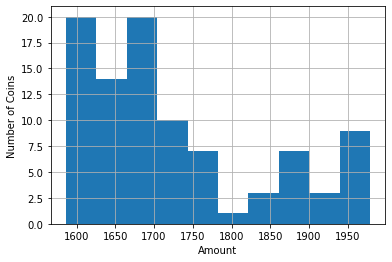

In [21]:
# graph histogram to see grouping of coin data available 

interval = 25

nbins = 2000//interval
# bins=[interval*x for x in range(0,nbins+1)]

meta_data['Num_values'].hist()
plt.xlabel('Amount')
plt.ylabel('Number of Coins')

Text(0, 0.5, 'Number of Coins')

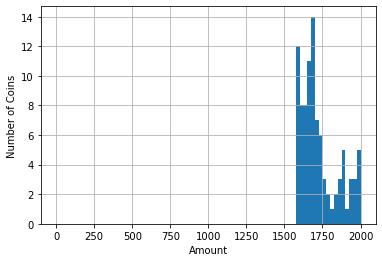

In [22]:
# change interval and range of histogram above to see relationship to zero
interval = 25

nbins = 2000//interval
bins=[interval*x for x in range(0,nbins+1)]

meta_data['Num_values'].hist(bins=bins)
plt.xlabel('Amount')
plt.ylabel('Number of Coins')

Text(0.5, 1.0, 'Coins Grouped by Amount of Data')

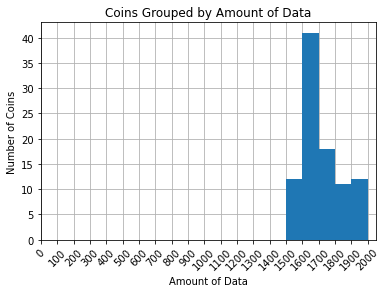

In [23]:
# create histogram to show various distributions of coins
# change interval of histogram abovecompare groupings

fig, ax = plt.subplots()

interval = 100

nbins = 2000//interval
bins=[interval*x for x in range(0,nbins+1)]

ax.hist(num, bins=bins, range=(0,2100))

ax.set_xlim(0,2050)
ax.set_xticks(bins)
ax.set_xticklabels(bins, rotation=45)
ax.grid(True)
ax.set_axisbelow(True)
ax.set_xlabel('Amount of Data')
ax.set_ylabel('Number of Coins')
ax.set_title('Coins Grouped by Amount of Data')

Text(0.5, 0, 'All Time High in USD $')

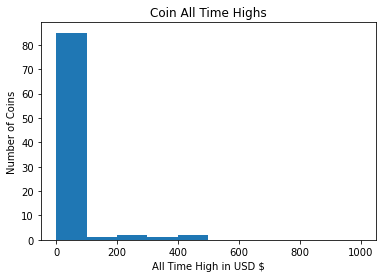

In [24]:
# graph ATH and ATL histogram

fig, ax = plt.subplots()

ax.hist(ath, range=(0, 10**3))
ax.set_title('Coin All Time Highs')
ax.set_ylabel('Number of Coins')
ax.set_xlabel('All Time High in USD $')

Text(0.5, 0, 'All Time High in USD $')

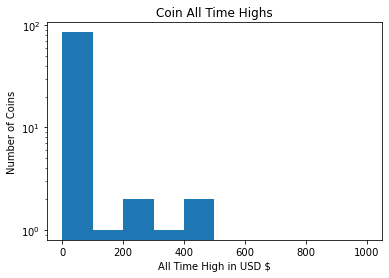

In [25]:
# graph ATH and ATL histogram
# change scale to log scale to better examine values
fig, ax = plt.subplots()

ax.hist(ath, range=(0, 10**3))
ax.set_yscale('log')
ax.set_title('Coin All Time Highs')
ax.set_ylabel('Number of Coins')
ax.set_xlabel('All Time High in USD $')

In [26]:
# meta_data.sort_values('ATL', ascending=False)

In [27]:
# ts['Date'] = pd.to_datetime(ts['Date'])

In [28]:
# create copy of timeseries dataframe for manipulation
ts_new = ts
ts_new

,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
0,2014-01-14,42,1.013620e+06,1.146320e+06,714246.000000,793273.000000,227918.0,832411.0
1,2014-01-15,42,7.931300e+05,8.848600e+05,732467.000000,785399.000000,125684.0,686616.0
2,2014-01-16,42,7.848430e+05,7.848430e+05,446406.000000,606667.000000,125138.0,709966.0
3,2014-01-17,42,6.058400e+05,6.058400e+05,470964.000000,503448.000000,68414.0,571094.0
4,2014-01-18,42,5.043310e+05,5.043310e+05,300906.000000,361200.000000,65047.0,484557.0
...,...,...,...,...,...,...,...,...
1835,2018-09-23,ZET,2.703000e-03,2.779000e-03,0.002577,0.002665,45598.0,455969.0
1836,2018-09-24,ZET,2.639000e-03,2.746000e-03,0.002546,0.002687,48981.0,445029.0
1837,2018-09-25,ZET,2.678000e-03,2.694000e-03,0.002474,0.002587,44178.0,451662.0
1838,2018-09-26,ZET,2.557000e-03,2.627000e-03,0.002461,0.002534,42550.0,431287.0


In [29]:
# change index to Date column
ts_new = ts.set_index('Date', drop=True)
ts_new

,Symbol,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,,
2014-01-14,42,1.013620e+06,1.146320e+06,714246.000000,793273.000000,227918.0,832411.0
2014-01-15,42,7.931300e+05,8.848600e+05,732467.000000,785399.000000,125684.0,686616.0
2014-01-16,42,7.848430e+05,7.848430e+05,446406.000000,606667.000000,125138.0,709966.0
2014-01-17,42,6.058400e+05,6.058400e+05,470964.000000,503448.000000,68414.0,571094.0
2014-01-18,42,5.043310e+05,5.043310e+05,300906.000000,361200.000000,65047.0,484557.0
...,...,...,...,...,...,...,...
2018-09-23,ZET,2.703000e-03,2.779000e-03,0.002577,0.002665,45598.0,455969.0
2018-09-24,ZET,2.639000e-03,2.746000e-03,0.002546,0.002687,48981.0,445029.0
2018-09-25,ZET,2.678000e-03,2.694000e-03,0.002474,0.002587,44178.0,451662.0


In [30]:
type(ts_new.index)

pandas.core.indexes.base.Index

In [31]:
ts_new.head()

,Symbol,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,,
2014-01-14,42,1013620.0,1146320.0,714246.0,793273.0,227918.0,832411.0
2014-01-15,42,793130.0,884860.0,732467.0,785399.0,125684.0,686616.0
2014-01-16,42,784843.0,784843.0,446406.0,606667.0,125138.0,709966.0
2014-01-17,42,605840.0,605840.0,470964.0,503448.0,68414.0,571094.0
2014-01-18,42,504331.0,504331.0,300906.0,361200.0,65047.0,484557.0


In [32]:
# change index to datetime objects for use in timeseries modeling
ts_new.set_index(pd.to_datetime(ts['Date']), drop=True, inplace=True)

In [33]:
ts_new

,Symbol,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,,
2014-01-14,42,1.013620e+06,1.146320e+06,714246.000000,793273.000000,227918.0,832411.0
2014-01-15,42,7.931300e+05,8.848600e+05,732467.000000,785399.000000,125684.0,686616.0
2014-01-16,42,7.848430e+05,7.848430e+05,446406.000000,606667.000000,125138.0,709966.0
2014-01-17,42,6.058400e+05,6.058400e+05,470964.000000,503448.000000,68414.0,571094.0
2014-01-18,42,5.043310e+05,5.043310e+05,300906.000000,361200.000000,65047.0,484557.0
...,...,...,...,...,...,...,...
2018-09-23,ZET,2.703000e-03,2.779000e-03,0.002577,0.002665,45598.0,455969.0
2018-09-24,ZET,2.639000e-03,2.746000e-03,0.002546,0.002687,48981.0,445029.0
2018-09-25,ZET,2.678000e-03,2.694000e-03,0.002474,0.002587,44178.0,451662.0


In [34]:
# confirm new index is Datetime
type(ts_new.index)

pandas.core.indexes.datetimes.DatetimeIndex

## Testing Properties of Datetime Index

## Resampling

In [35]:
ts_new

,Symbol,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,,
2014-01-14,42,1.013620e+06,1.146320e+06,714246.000000,793273.000000,227918.0,832411.0
2014-01-15,42,7.931300e+05,8.848600e+05,732467.000000,785399.000000,125684.0,686616.0
2014-01-16,42,7.848430e+05,7.848430e+05,446406.000000,606667.000000,125138.0,709966.0
2014-01-17,42,6.058400e+05,6.058400e+05,470964.000000,503448.000000,68414.0,571094.0
2014-01-18,42,5.043310e+05,5.043310e+05,300906.000000,361200.000000,65047.0,484557.0
...,...,...,...,...,...,...,...
2018-09-23,ZET,2.703000e-03,2.779000e-03,0.002577,0.002665,45598.0,455969.0
2018-09-24,ZET,2.639000e-03,2.746000e-03,0.002546,0.002687,48981.0,445029.0
2018-09-25,ZET,2.678000e-03,2.694000e-03,0.002474,0.002587,44178.0,451662.0


In [36]:
ts_groups=ts_new.groupby('Symbol')
ts_groups.first()

,Open,High,Low,Close,Volume,Market Cap
Symbol,,,,,,
42,1.013620e+06,1.146320e+06,714246.000000,793273.000000,227918.0,832411.0
AC,5.434000e-03,1.177300e-02,0.005434,0.010332,146184.0,257774.0
ANC,2.806800e-02,3.025700e-02,0.011833,0.018696,16203.0,6520.0
ARG,7.780000e-03,8.337000e-03,0.007225,0.007455,1681.0,2588.0
ARI,4.050000e-04,4.530000e-04,0.000294,0.000321,364.0,7370.0
...,...,...,...,...,...,...
XPM,2.633760e-01,6.368990e-01,0.172000,0.533880,67275.0,51274.0
XRP,5.874000e-03,5.927000e-03,0.005874,0.005882,148422.0,45921000.0
XWC,2.732000e-03,9.037000e-03,0.002496,0.008127,870425.0,354448.0


In [37]:
ts_groups.resample('M').mean()
ts_groups.first()

,Open,High,Low,Close,Volume,Market Cap
Symbol,,,,,,
42,1.013620e+06,1.146320e+06,714246.000000,793273.000000,227918.0,832411.0
AC,5.434000e-03,1.177300e-02,0.005434,0.010332,146184.0,257774.0
ANC,2.806800e-02,3.025700e-02,0.011833,0.018696,16203.0,6520.0
ARG,7.780000e-03,8.337000e-03,0.007225,0.007455,1681.0,2588.0
ARI,4.050000e-04,4.530000e-04,0.000294,0.000321,364.0,7370.0
...,...,...,...,...,...,...
XPM,2.633760e-01,6.368990e-01,0.172000,0.533880,67275.0,51274.0
XRP,5.874000e-03,5.927000e-03,0.005874,0.005882,148422.0,45921000.0
XWC,2.732000e-03,9.037000e-03,0.002496,0.008127,870425.0,354448.0


In [38]:
ts_groups.resample('D').mean()
ts_groups.first()

,Open,High,Low,Close,Volume,Market Cap
Symbol,,,,,,
42,1.013620e+06,1.146320e+06,714246.000000,793273.000000,227918.0,832411.0
AC,5.434000e-03,1.177300e-02,0.005434,0.010332,146184.0,257774.0
ANC,2.806800e-02,3.025700e-02,0.011833,0.018696,16203.0,6520.0
ARG,7.780000e-03,8.337000e-03,0.007225,0.007455,1681.0,2588.0
ARI,4.050000e-04,4.530000e-04,0.000294,0.000321,364.0,7370.0
...,...,...,...,...,...,...
XPM,2.633760e-01,6.368990e-01,0.172000,0.533880,67275.0,51274.0
XRP,5.874000e-03,5.927000e-03,0.005874,0.005882,148422.0,45921000.0
XWC,2.732000e-03,9.037000e-03,0.002496,0.008127,870425.0,354448.0


In [39]:
tsD = ts_new.resample('M').sum()
tsD.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-30,446.548424,465.121661,431.591835,451.151419,0.0,4.863443e+09
2013-05-31,4847.779104,5117.495376,4439.473059,4738.282828,0.0,4.383638e+10
2013-06-30,3777.476284,3882.590481,3609.765271,3731.727122,0.0,3.857381e+10
2013-07-31,3192.352132,3335.225085,3050.861789,3199.250553,0.0,3.400265e+10
2013-08-31,3892.835304,4005.321159,3821.086442,3915.278524,0.0,4.380964e+10


In [40]:
# Resample index to montly values
tsM = ts_new.resample('M').sum().reset_index()
tsM.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-04-30,446.548424,465.121661,431.591835,451.151419,0.0,4.863443e+09
1,2013-05-31,4847.779104,5117.495376,4439.473059,4738.282828,0.0,4.383638e+10
2,2013-06-30,3777.476284,3882.590481,3609.765271,3731.727122,0.0,3.857381e+10
3,2013-07-31,3192.352132,3335.225085,3050.861789,3199.250553,0.0,3.400265e+10
4,2013-08-31,3892.835304,4005.321159,3821.086442,3915.278524,0.0,4.380964e+10


In [41]:
ts

,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
0,2014-01-14,42,1.013620e+06,1.146320e+06,714246.000000,793273.000000,227918.0,832411.0
1,2014-01-15,42,7.931300e+05,8.848600e+05,732467.000000,785399.000000,125684.0,686616.0
2,2014-01-16,42,7.848430e+05,7.848430e+05,446406.000000,606667.000000,125138.0,709966.0
3,2014-01-17,42,6.058400e+05,6.058400e+05,470964.000000,503448.000000,68414.0,571094.0
4,2014-01-18,42,5.043310e+05,5.043310e+05,300906.000000,361200.000000,65047.0,484557.0
...,...,...,...,...,...,...,...,...
1835,2018-09-23,ZET,2.703000e-03,2.779000e-03,0.002577,0.002665,45598.0,455969.0
1836,2018-09-24,ZET,2.639000e-03,2.746000e-03,0.002546,0.002687,48981.0,445029.0
1837,2018-09-25,ZET,2.678000e-03,2.694000e-03,0.002474,0.002587,44178.0,451662.0
1838,2018-09-26,ZET,2.557000e-03,2.627000e-03,0.002461,0.002534,42550.0,431287.0


In [42]:
ts_new.resample('Y').count()

,Symbol,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,,
2013-12-31,5132,5132,5132,5132,5132,195,5132
2014-12-31,30079,30079,30079,30079,30079,30079,30079
2015-12-31,34250,34250,34250,34250,34250,34250,34250
2016-12-31,33720,33720,33720,33720,33720,33720,33703
2017-12-31,34040,34040,34040,34040,34040,34040,33732
2018-12-31,25069,25069,25069,25069,25069,25069,24760


In [43]:
ts_new.resample('D').count()

,Symbol,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,,
2013-04-28,6,6,6,6,6,0,6
2013-04-29,6,6,6,6,6,0,6
2013-04-30,6,6,6,6,6,0,6
2013-05-01,6,6,6,6,6,0,6
2013-05-02,6,6,6,6,6,0,6
...,...,...,...,...,...,...,...
2018-09-23,90,90,90,90,90,90,89
2018-09-24,90,90,90,90,90,90,89
2018-09-25,90,90,90,90,90,90,89
